In [3]:
import math as m
def k(x,y):
    k = (-5*y +10)/(x+2)**(-5/2) ## To check k's value with i.c
    return k
print(k(0,0))
print(k(0,3))

56.5685424949238
-28.2842712474619


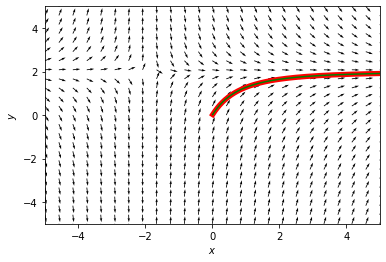

In [7]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (-5*x[1]+10)/(2*x[0]+4)    ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[0,0]]
color=['r','y']
listY = [] ## Lista vacia para añadir valores de Y del for..


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)
        
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,25),np.linspace(-5,5,25) )

V = (-5*Y+10)/(2*X+4)   ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = S[:,0]
y_exact = (((xs +2)**(-5/2))*56.5685 -10)/-5
plt.plot(xs, y_exact, "-", color = "g")

#y_exact2 = (((2*xs +4)**(-5/2))*(-160) -10)/-5
#plt.plot(xs, y_exact2, "-", color = "b")


##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Text(0.5, 1.0, 'Error in numerical integration')

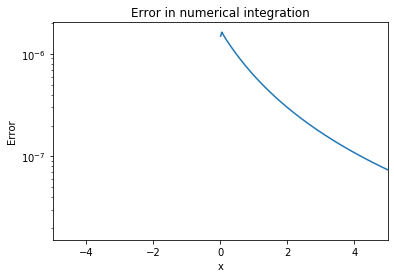

In [8]:
y_diff = np.abs(y_exact-listY)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.xlim([-5,5])
plt.title("Error in numerical integration")

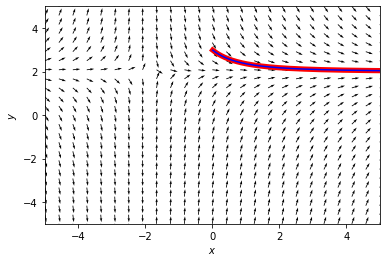

In [9]:
import matplotlib.pyplot as plt
from scipy import *
from scipy import integrate
from scipy.integrate import ode
import numpy as np
import math 

fig = plt.figure(num=1)
ax=fig.add_subplot(111)


## Vector field function
## x[0] = x // x[1] = y

def vf(t,x):
  dx=np.zeros(2)

  dx[0]=1
  dx[1]= (-5*x[1]+10)/(2*x[0]+4)    ## <- Here equation of dy/dx
  return dx

##Solution curves
t0=0; tEnd=10; dt=0.01;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

##Initial conditions for ecah line with its color
ic=[[0,3]]
color=['r','y']
listY = [] ## Lista vacia para añadir valores de Y del for..


for k in range(len(ic)):
    Y=[];T=[];S=[];
    r.set_initial_value(ic[k], t0).set_f_params()
    while r.successful() and r.t +dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S=np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color = color[k], lw = 5.25)
    
    for elem in S[:,1]:
        listY.append(elem)
        
    

##Vector field with its linespace(interval)
X,Y = np.meshgrid( np.linspace(-5,5,25),np.linspace(-5,5,25) )

V = (-5*Y+10)/(2*X+4)   ## <- Here equation of dy/dx


##Normalize arrows not to have long arrows similar
U = 1
N = np.sqrt(U**2+V**2)  
U2, V2 = U/N, V/N
ax.quiver( X,Y,U2, V2)

##Analytical solution
xs = S[:,0]

y_exact2 = (((xs +2)**(-5/2))*(-28.2842) -10)/-5
plt.plot(xs, y_exact2, "-", color = "b")


##Limits of the graph
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.show()

Text(0.5, 1.0, 'Error in numerical integration')

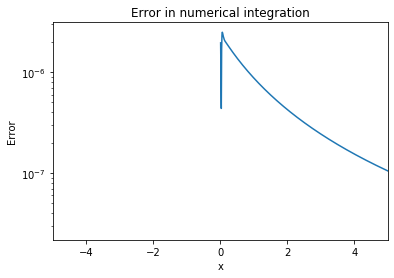

In [10]:
y_diff = np.abs(y_exact2-listY)
plt.semilogy(xs, y_diff)
plt.ylabel("Error")
plt.xlabel("x")
plt.xlim([-5,5])
plt.title("Error in numerical integration")